Filter to bridges within the city ring, with the help of chatGPT

In [41]:
import sqlite3

conn = sqlite3.connect('bridgesII.sql')
cursor = conn.cursor()

cursor.execute('SELECT latitude, longitude FROM node')
points = cursor.fetchall()

conn.close()

We'll take the convex hull of the ring for simplicity

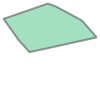

In [68]:
import osmium
from shapely.geometry import Polygon
from scipy.spatial import ConvexHull
import numpy as np

class CityRingHandler(osmium.SimpleHandler):
    def __init__(self):
        super().__init__()
        self.city_ring_ways = []

    def relation(self, r):
        if r.id == 13281314:
            self.city_ring_ways.extend(w.ref for w in r.members if w.type=='w')

handler = CityRingHandler()
handler.apply_file('groningen_city.pbf')

refs = set(handler.city_ring_ways)

class RingWayHandler(osmium.SimpleHandler):
    def __init__(self):
        super().__init__()
        self.locations = []

    def way(self, w):
        if w.id in refs:
            self.locations.extend([(n.lon, n.lat) for n in w.nodes])

handler = RingWayHandler()
handler.apply_file('groningen_city.pbf')

ring_nodes = np.array(handler.locations)
hull = ConvexHull(handler.locations)
hull_points = ring_nodes[hull.vertices]
ring = Polygon(hull_points)
ring

In [61]:
from shapely.geometry import Point

def filter_bridges_in_city_ring(points, city_ring_polygon):
    bridges_in_ring = []
    for lat, lon in points:
        point = Point(lon, lat)
        if cityfrom shapely.geometry import Point

def filter_bridges_in_city_ring(points, city_ring_polygon):
    bridges_in_ring = []
    for lon, lat in points:
        point = Point(lon, lat)
        if city_ring_polygon.contains(point):
            bridges_in_ring.append((lon, lat))
    return bridges_in_ring

# Usage example
points = [...]  # Replace with your list of bridge coordinates
bridges_within_city_ring = filter_bridges_in_city_ring(points, city_ring_polygon)
BBH_ring_polygon.contains(point):
            bridges_in_ring.append((lon, lat))
    return bridges_in_ring

bridges_within_city_ring = filter_bridges_in_city_ring(points, city_ring_polygon)
len(bridges_within_city_ring)

0

In [65]:
ring.contains_properly()

False

class BoundaryHandler(osmium.SimpleHandler):
    def __init__(self):
        super().__init__()
        self.ways = {}
        self.relations = []

    def way(self, w):
        self.ways[w.id] = [(n.lat, n.lon) for n in w.nodes]

    def relation(self, r):
        if r.id == 13281314:
            self.relations.extend([m.ref for m in r.members if m.type == 'w'])

handler = BoundaryHandler()
handler.apply_file("groningen_city.pbf")

def create_full_boundary(handler):
    way_ref = handler.relations[0]
    locs = handler.ways[way_ref]
    full_boundary = locs[1:]
    for way_ref in handler.relations[1:]:
        locs = handler.ways[way_ref]
        if locs[0] == full_boundary[-1]:
            full_boundary.extend(locs[1:])
        elif locs[-1] == full_boundary[-1]:
            full_boundary.extend(locs[-2::-1])
        else:
            print(way_ref)
            raise TypeError("This didn't work!")
    return full_boundary

full_boundary = create_full_boundary(handler)


In [ ]:

def create_city_ring_polygon(city_ring_file):
    handler = CityRingPolygonHandler()
    handler.apply_file(city_ring_file)
    
    # Combine the ways to form a closed polygon (assuming they form a ring)
    city_ring_line = LineString()
    for way in handler.city_ring_ways:
        city_ring_line = city_ring_line.union(way)
    
    # Create a buffer around the line to form a polygon if necessary
    city_ring_polygon = city_ring_line.buffer(0.001).envelope  # Adjust buffer as needed
    return city_ring_polygon

# Usage
city_ring_polygon = create_city_ring_polygon("city_ring.pbf")
city_ring_polygon

In [13]:
from shapely.geometry import Point

def filter_bridges_in_city_ring(points, city_ring_polygon):
    bridges_in_ring = []
    for lat, lon in points:
        point = Point(lon, lat)
        if city_ring_polygon.contains(point):
            bridges_in_ring.append((lon, lat))
    return bridges_in_ring

bridges_within_city_ring = filter_bridges_in_city_ring(points, city_ring_polygon)

In [14]:
bridges_within_city_ring

[]

In [4]:
BridgeLoc = complex
BridgeID = int
bridgelocs = [BridgeLoc(p[0], p[1]) for p in points]
bridges = {i: bridgelocs[i] for i in range(len(bridgelocs))}

def metric1_locs(A: BridgeLoc, B: BridgeLoc):
    return abs(A - B)

def metric1(A: BridgeID, B: BridgeID):
    return abs(bridges[A] - bridges[B])

In [ ]:
import numpy as np

np.empty(len(points), len(points))
